In [1]:
import utils.EDAUtils as eda
import utils.visualization as viz

## View a chunk of data to understand it

In [2]:
df = eda.load_data('../data/dataset.csv')
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
print(df.describe())
df.describe(include='object')

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,20.2,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


### Data Summary Analysis

Based on the descriptive statistics above, here are the key takeaways:

1.  **Demographics**:
    *   **Gender**: The dataset is balanced between males and females.
    *   **SeniorCitizen**: Only ~16% of the customers are senior citizens.
    *   **Partner/Dependents**: Most customers do not have dependents (70%), while the split for having a partner is nearly even.

2.  **Account & Services**:
    *   **Tenure**: The average tenure is approx. 32 months. 50% of customers have stayed for fewer than 29 months.
    *   **Contract**: The most common contract type is **Month-to-month** (3875 customers), which indicates a high flexibility but potentially higher risk of churning.
    *   **Payment**: **Electronic check** is the most preferred payment method.
    *   **Services**: **PhoneService** is very common (90%). **Fiber optic** is the most frequent internet service.

3.  **Financials**:
    *   **MonthlyCharges**: The mean monthly charge is ~$64.76, ranging from $18.25 to $118.75.
    *   **TotalCharges**: The spread is large, heavily influenced by tenure (Max: ~$8684).

4.  **Target Variable (Churn)**:
    *   **Imbalance**: The dataset is imbalanced.
        *   **No Churn**: 5174 (Top class)
        *   **Churn**: 1869 (implied)
    *   This indicates that accuracy alone might not be the best metric for evaluation.

In [5]:
clean_df = eda.clean_data(df)

Duplicate rows found: 0
Missing values in TotalCharges: 11
customerID dropped.


c:\Users\midou\Desktop\root\study\ML\project\utils\visualization.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=target_col, data=df, palette='viridis')


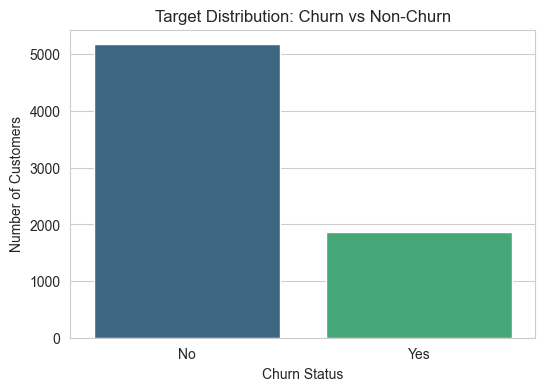

In [6]:
viz.plot_target_distribution(clean_df)

### Analysis of Target Distribution

**Observations:**
* **Class Imbalance:** The dataset is heavily imbalanced.
    * **Loyal Customers (No):** ~73% (approx. 5,174 users)
    * **Churned Customers (Yes):** ~27% (approx. 1,869 users)
* **Baseline Accuracy:** A naive model that predicts "No Churn" for everyone would achieve **73% accuracy** but provide **zero business value**.

**Conclusion & Strategy:**
1.  **Metric Selection:** We cannot rely on Accuracy alone. We must optimize for **Recall** (to catch churners) and **F1-Score** (to balance precision/recall).
2.  **Splitting Strategy:** We must use **Stratified Sampling** during the Train/Test split to ensure the 73/27 ratio is preserved in both sets.
3.  **Modeling:** We will likely need to handle this imbalance using techniques like **Class Weights** or **SMOTE** in the training phase.

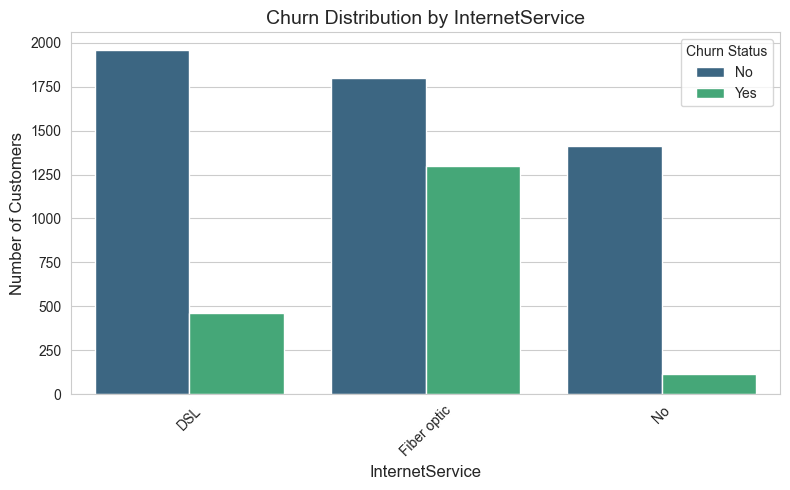

In [7]:
viz.plot_categorical_distributions(clean_df, ['InternetService'])

### Analysis of Internet Service

**Observations:**
* **Fiber Optic:** Shows the highest churn rate by a significant margin. The ratio of Churners (Green) to Loyalists (Blue) is nearly equal, suggesting a churn rate approaching 40-45%.
* **DSL:** Shows a moderate, standard churn rate.
* **No Internet:** These customers are highly stable with very low churn.

**Business Insight:**
* Customers with **Fiber Optic** are high-risk. The business should investigate if this is due to technical issues (outages) or pricing (high cost).
* **Modeling Strategy:** This feature is highly predictive. We must ensure our model pays close attention to it (which it will do automatically via One-Hot Encoding).

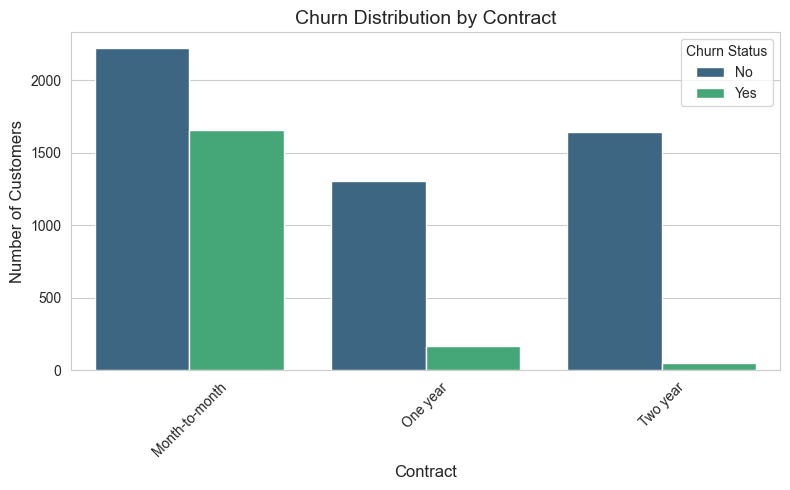

In [8]:
viz.plot_categorical_distributions(clean_df, ['Contract'])

### Analysis of Contract Type

**Observations:**
* **Month-to-month:** This is the most popular contract type but also the most volatile. It accounts for the vast majority of churners. The churn rate here is extremely high (~40-45%).
* **Long-term Contracts (1-2 Years):** Shows a drastic reduction in churn. The "Two year" contract has a "No" bar that is nearly invisible for Churners.

**Business Insight:**
* **Strategy:** The business should aggressively incentivize Month-to-month users to switch to 1-Year contracts (e.g., offer a 10% discount for locking in).
* **Predictive Power:** Knowing a customer is on a "Month-to-month" contract is effectively the single strongest warning sign of potential churn.

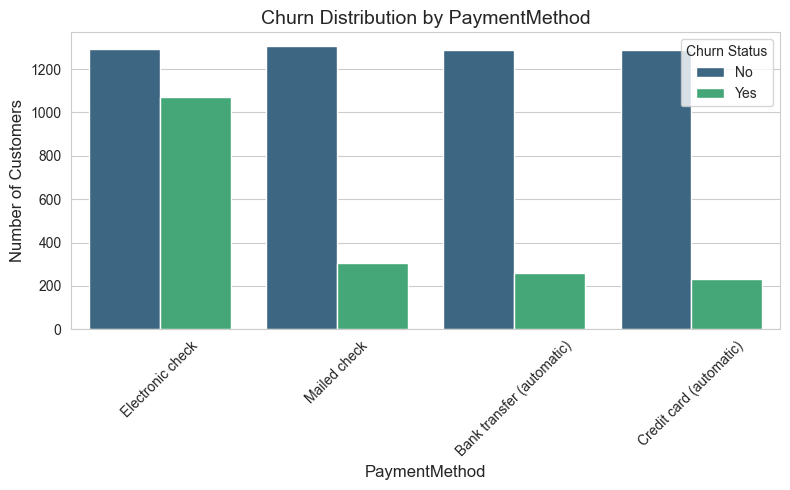

In [9]:
viz.plot_categorical_distributions(clean_df, ['PaymentMethod'])

### Analysis of Payment Method

**Observations:**
* **Electronic Check:** This is the clear outlier. It has the highest churn rate by far, with the number of churners (Green) approaching the number of loyal customers (Blue).
* **Automatic Payments:** "Bank transfer (automatic)" and "Credit card (automatic)" have the lowest churn rates.
* **Mailed Check:** Low churn, likely used by older demographics who are generally more loyal/stable.

**Business Insight:**
* **The "Friction" Hypothesis:** Electronic checks likely require manual intervention each month, forcing the customer to re-evaluate the service value. Automatic payments reduce this friction.
* **Action:** The business should heavily incentivize customers to switch to "Automatic" payment methods (e.g., "$5 off per month for Auto-Pay").

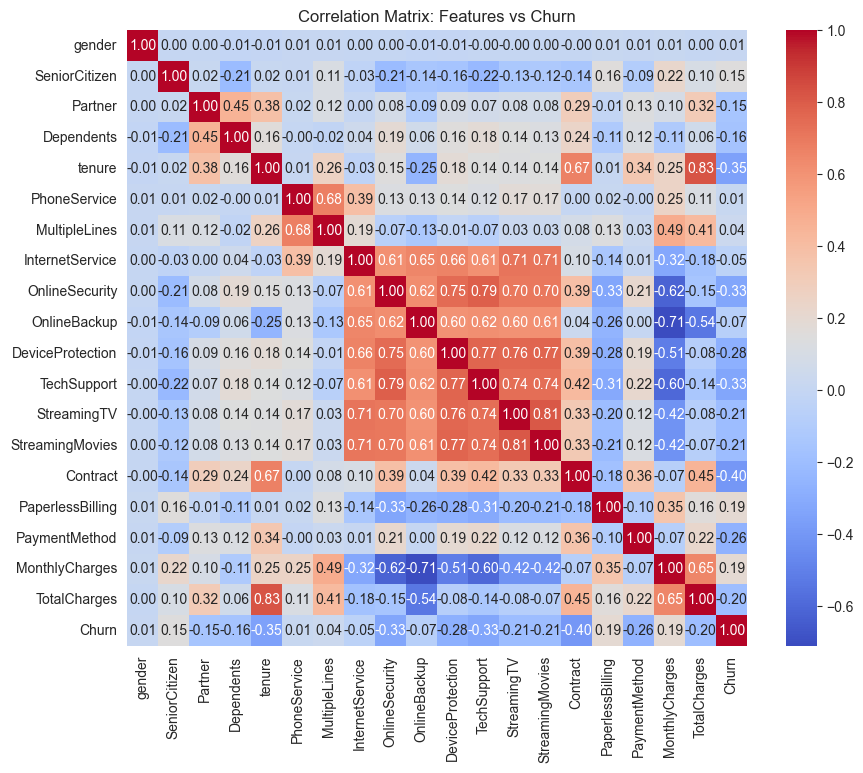

In [10]:

df_eda_encoded = eda.encode_for_eda(clean_df)
viz.plot_correlation_heatmap(df_eda_encoded)

### Analysis of Correlation Matrix

**Observations:**
* **Top Negative Predictors (Stability):**
    * `Contract` (-0.40) and `tenure` (-0.35) are the strongest predictors of retention. Long-term contracts and high tenure effectively guarantee loyalty.
* **Top Positive Predictors (Risk):**
    * `MonthlyCharges` (+0.19): Higher costs are linearly associated with higher churn.
    * `PaperlessBilling` (+0.19): Surprisingly implies that customers using paperless billing are at higher risk.
* **Multicollinearity Alert:**
    * `tenure` and `TotalCharges` have a correlation of **0.83**. This indicates redundancy. We may need to drop `TotalCharges` to avoid multicollinearity in linear models.

**Data Preparation Implications:**
* **One-Hot Encoding:** Categorical features like `InternetService` show low correlation (-0.05) due to arbitrary label encoding (0, 1, 2). One-Hot Encoding in the next notebook is required to reveal their true predictive power.

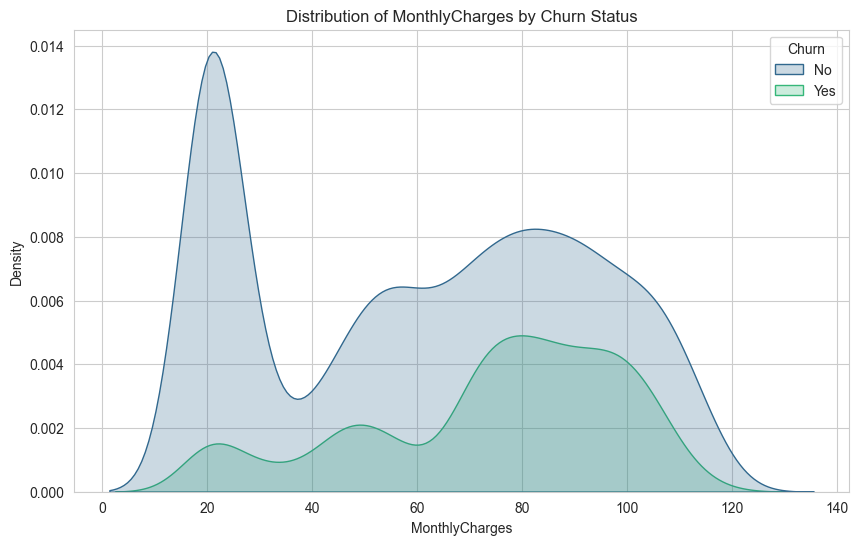

In [11]:
viz.plot_numeric_distribution(df, 'MonthlyCharges')

### Analysis of Monthly Charges

**Observations:**
* **Low Prices ($20-30):** This is the "Safe Zone." The blue curve peaks here, indicating a large concentration of loyal customers paying low rates (likely DSL or No Internet). Churn is minimal.
* **High Prices ($70-110):** This is the "Risk Zone." The green curve (Churners) is consistently high in this range.
* **Conclusion:** There is a clear link between higher monthly bills and customer churn. The business is losing its high-value customers.

c:\Users\midou\Desktop\root\study\ML\project\utils\visualization.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=x_col, y=y_col, palette='viridis')


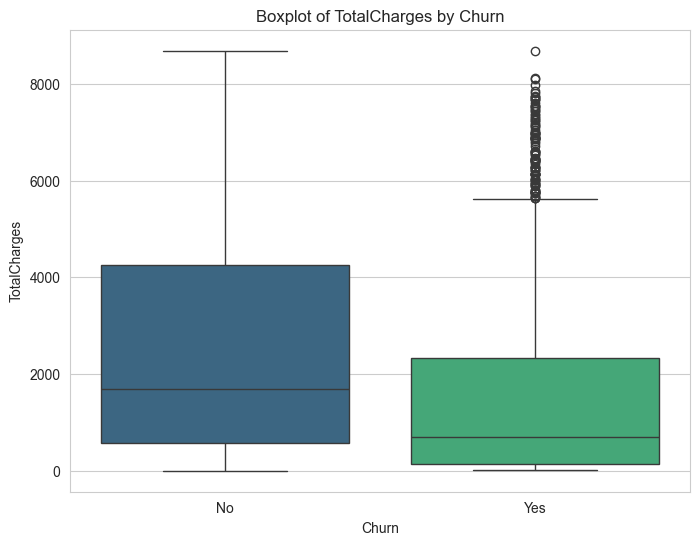

In [12]:
# Check for outliers in TotalCharges
viz.plot_boxplot(df, 'Churn', 'TotalCharges')


### Analysis of Total Charges (Box Plot)

**Observations:**
* **Loyal Customers (No):** The box is tall and the whiskers extend fully, indicating that loyal customers are distributed across the entire spectrum of spending—from new users to long-term high spenders.
* **Churned Customers (Yes):** The distribution is heavily skewed towards low values. The median is very low (< $1,000), confirming that most churn occurs early in the customer lifecycle before they accumulate a large total bill.
* **The "Whales" (Outliers):**
    * There is a distinct stream of outliers (black dots) for Churned customers ranging from **$6,000 to $8,000**.
    * **Crucial Insight:** These represent long-term, high-value customers who eventually churned. While statistically rare, they represent significant revenue loss. **We must NOT remove these outliers**, as catching them is critical for business retention.

c:\Users\midou\Desktop\root\study\ML\project\utils\visualization.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=x_col, y=y_col, palette='viridis')


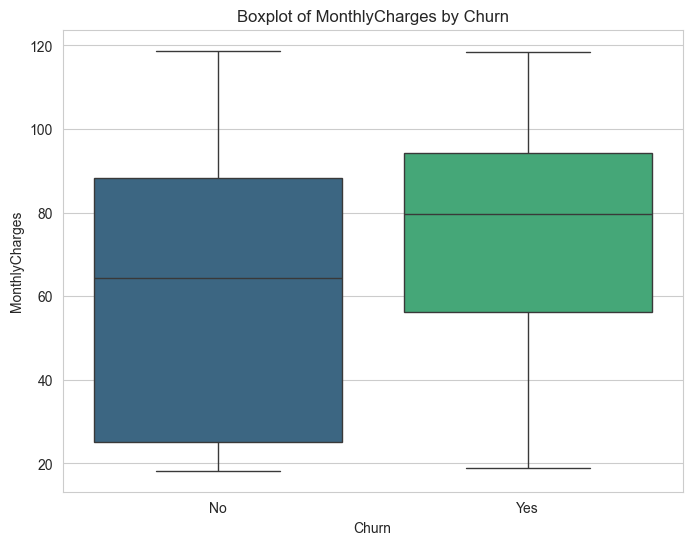

In [13]:

# Check for outliers in MonthlyCharges
viz.plot_boxplot(df, 'Churn', 'MonthlyCharges')

### Analysis of Monthly Charges

**Observations:**
* **Higher Median Cost for Churners:** The median monthly bill for customers who churn (~$80) is significantly higher than for those who stay (~$65).
* **The "Safe Zone" ($20-$30):** There is a large concentration of loyal customers paying low rates (likely DSL or basic plans). Churn in this price bracket is minimal.
* **The "Danger Zone" ($70-$100):** Churn risk skyrockets as the monthly price increases. The upper quartile for churners is densely packed in the high-price range, correlating with the "Fiber Optic" findings.

**Conclusion:**
* Price sensitivity is a major driver of churn. The business is retaining budget customers but losing premium subscribers.

## Executive Summary: Exploratory Data Analysis (EDA)

**1. Data Health & Structure**
* **Imbalance:** The dataset is imbalanced (**73% Loyal / 27% Churn**). We cannot rely on Accuracy as a metric; we will optimize for **F1-Score** and **Recall**.
* **Data Integrity:** No duplicates were found. Missing values in `TotalCharges` were handled by imputing 0 (new customers).

**2. Key Churn Drivers (Risk Factors)**
* **Contract Type:** The strongest predictor. **Month-to-month** contracts have a massive churn rate (~40%), while 2-Year contracts are virtually churn-free.
* **Internet Service:** **Fiber Optic** users are the highest risk group, likely due to higher costs or technical issues.
* **Payment Friction:** **Electronic Check** users churn frequently. Automatic payment methods (Credit Card/Bank Transfer) serve as a retention lock.
* **Price Sensitivity:** Churners pay significantly higher monthly fees on average. There is a "safe zone" at low prices ($20), but risk escalates rapidly above $70/month.

**3. Strategic Decisions for Modeling (Notebook 02)**
* **Feature Selection:** We will drop `TotalCharges` due to severe multicollinearity (0.83 correlation) with `tenure`.
* **Encoding:** We must use **One-Hot Encoding** for categorical variables like `InternetService` and `PaymentMethod` to capture their specific risk profiles.
* **Splitting:** We will use **Stratified Sampling** to maintain the 73/27 class ratio in our Train/Test sets.
* **Outliers:** We will preserve the high-value outliers in `TotalCharges` to ensure the model learns to identify high-revenue churners.